In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate the user
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Get your file
fileId ='179xH_0UpcG2hd1pJ6gKNMh54s37Z-o2q'
fileName = 'train.csv'
downloaded = drive.CreateFile({'id':fileId})
downloaded.GetContentFile(fileName)

In [6]:
import pandas as pd

dataset = pd.read_csv(fileName)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
for col in dataset.columns.values:
  if dataset[col].isnull().values.any():
    print(col + " xd")

Age xd
Cabin xd
Embarked xd


In [0]:
del dataset['Cabin']
del dataset['Embarked']
del dataset['PassengerId']
del dataset['Ticket']
del dataset['Fare']
del dataset['Name']

dataset = dataset[ pd.notnull(dataset['Age'])]


In [9]:
for col in dataset.columns.values:
  if dataset[col].isnull().values.any():
    print(col + " xd")
  else:
    print(col + " is not xd")  

Survived is not xd
Pclass is not xd
Sex is not xd
Age is not xd
SibSp is not xd
Parch is not xd


In [10]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(dataset['Sex'])
dataset['Sex'] = encoder.transform(dataset['Sex'])
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
model = MLPClassifier()

y = dataset['Survived']
X = dataset.loc[:, dataset.columns != 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)


In [23]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


0.788135593220339


In [25]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X,y,cv=5)

print(scores)
print(np.mean(scores))


[0.81118881 0.83916084 0.58741259 0.6013986  0.41549296]
0.6509307593814636


In [26]:
from sklearn.metrics import cohen_kappa_score
preds = model.predict(X_test)
score = cohen_kappa_score(y_test, preds)
print(score)


0.55629089268256


In [27]:
from sklearn.metrics import confusion_matrix
preds = model.predict(X_test)
cm = confusion_matrix(preds, y_test)
print(cm)

[[119  32]
 [ 18  67]]


In [31]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

kappa_scorer = make_scorer(cohen_kappa_score)
param_space = {
    'activation':['logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'adam', 'sgd'],
    'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

grid = GridSearchCV(MLPClassifier(), param_grid = param_space, scoring = kappa_scorer)
grid.fit(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'adam', 'sgd'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(cohen_kappa_score), verbose=0)

In [32]:
grid.cv_results_.keys()
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.1, 'solver': 'lbfgs'}


In [0]:
def model_scoring(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  print("Accuracy: ", score)
  
  preds = model.predict(X_test)
  kappa = cohen_kappa_score(y_test,preds)
  print("Kappa: ", kappa)
  
  cv = cross_val_score(model, X_train, y_train, cv=5)
  print("Cross Val:", cv)
  print("Average: ", np.mean(cv))

In [41]:
model = MLPClassifier(activation = 'relu', alpha = 0.1, solver = 'lbfgs')
model_scoring(model, X_train, X_test, y_train, y_test)

Accuracy:  0.809322033898305
Kappa:  0.5931034482758621
Cross Val: [0.78350515 0.80208333 0.88421053 0.8        0.85263158]
Average:  0.8244861186471333


In [42]:
from sklearn.model_selection import RandomizedSearchCV
rsearch = RandomizedSearchCV(MLPClassifier(), param_distributions = param_space, scoring = kappa_scorer)
rsearch.fit(X,y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'adam', 'sgd'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(cohen_kappa_score), verbose=0)

In [43]:
rsearch.best_params_

{'activation': 'relu', 'alpha': 10.0, 'solver': 'lbfgs'}

In [45]:
model = MLPClassifier(activation = 'logistic', alpha = 1.0, solver = 'lbfgs')
model_scoring(model, X_train, X_test, y_train, y_test)

Accuracy:  0.7923728813559322
Kappa:  0.5595002285540149
Cross Val: [0.77319588 0.80208333 0.89473684 0.82105263 0.85263158]
Average:  0.8287400524507145


In [47]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target)

df = pd.DataFrame(bc.data, columns = bc.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log')
model_scoring(model , X_train, X_test, y_train, y_test)

Accuracy:  0.5314685314685315
Kappa:  0.21020525925315314
Cross Val: [0.77906977 0.75294118 0.88235294 0.95294118 0.91764706]
Average:  0.8569904240766075


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scoring(model, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy:  0.958041958041958
Kappa:  0.9061063690085358
Cross Val: [0.96511628 0.97647059 0.96470588 0.81176471 0.96470588]
Average:  0.9365526675786594


In [56]:
from sklearn.ensemble import BaggingClassifier
bgg = BaggingClassifier(base_estimator = SGDClassifier(loss='log'), n_estimators=50)
model_scoring(bgg, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy:  0.972027972027972
Kappa:  0.9390451832907076
Cross Val: [0.94186047 0.96470588 0.97647059 0.97647059 0.96470588]
Average:  0.96484268125855


In [61]:
bc = load_breast_cancer()
df = pd.DataFrame(bc.data, columns = bc.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


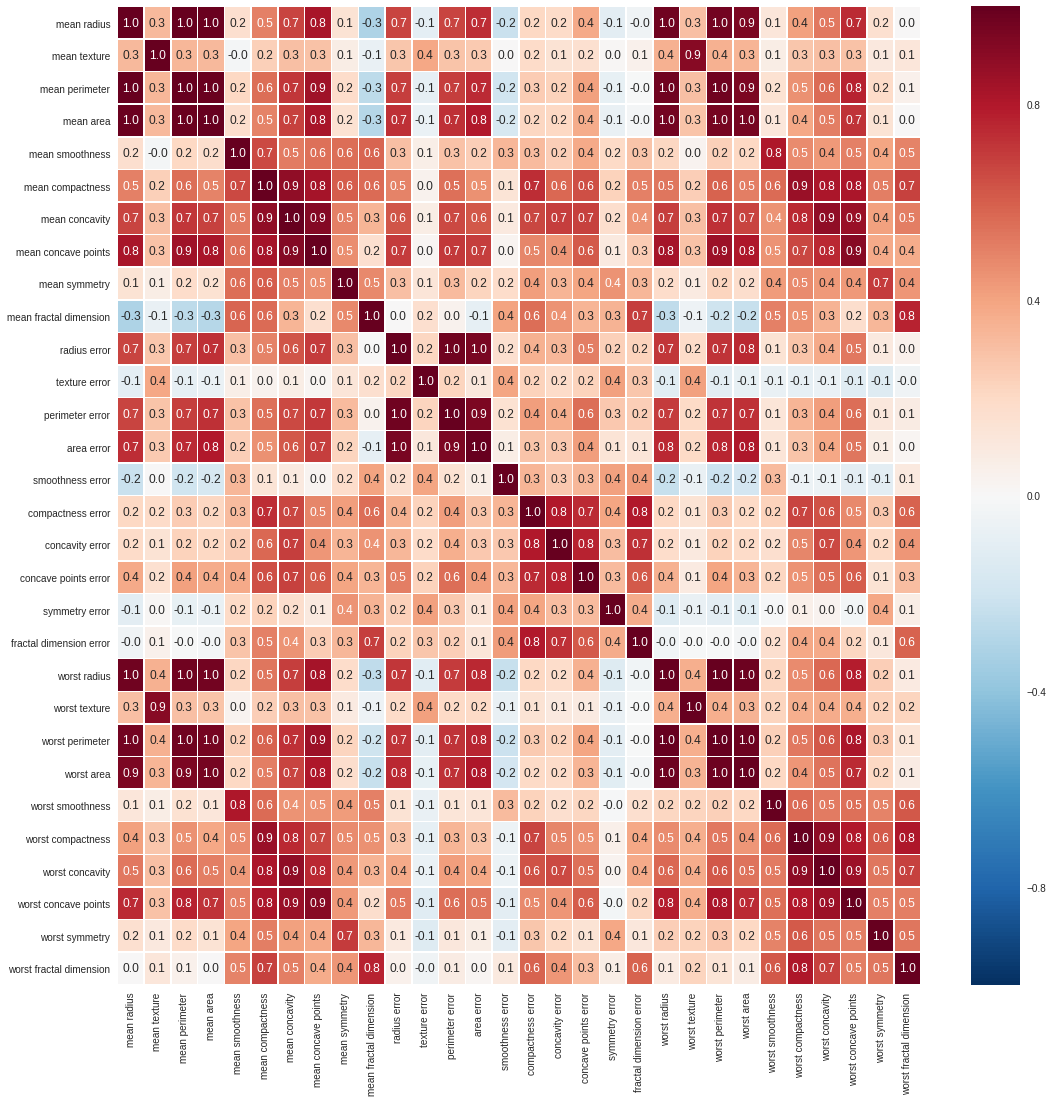

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, fmt = '.1f', ax=ax)

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
X_train_sel = select_feature.transform(X_train)
X_test_sel = select_feature.transform(X_test)

In [64]:
model = SGDClassifier(loss='log')
model_scoring(model, X_train_sel, X_test_sel, y_train, y_test)

Accuracy:  0.8041958041958042
Kappa:  0.5138416707139388
Cross Val: [0.88372093 0.67058824 0.42352941 0.94117647 0.81176471]
Average:  0.746155950752394


In [65]:
print(len(X_train[0]))
print(len(X_train_sel[0]))

30
5


In [0]:
from sklearn.pipeline import Pipeline

stack = []
stack.append(('feature_sel', SelectKBest(chi2, k=5)))
stack.append(('scaler', MinMaxScaler()))
stack.append(('classifier', SGDClassifier(loss = 'log')))
pipeline = Pipeline(stack)


In [70]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('feature_sel', SelectKBest(k=5, score_func=<function chi2 at 0x7fee770360d0>)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classifier', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [71]:
model_scoring(pipeline,X_train, X_test,y_train,y_test)

Accuracy:  0.8951048951048951
Kappa:  0.7763061841693607
Cross Val: [0.94186047 0.88235294 0.87058824 0.88235294 0.85882353]
Average:  0.8871956224350205
